In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('bank.csv',sep=';')

In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
df['previous'].value_counts()

previous
0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
24       1
22       1
23       1
17       1
18       1
15       1
13       1
19       1
20       1
25       1
Name: count, dtype: int64

In [25]:
cat_col=df.select_dtypes(include='object').columns

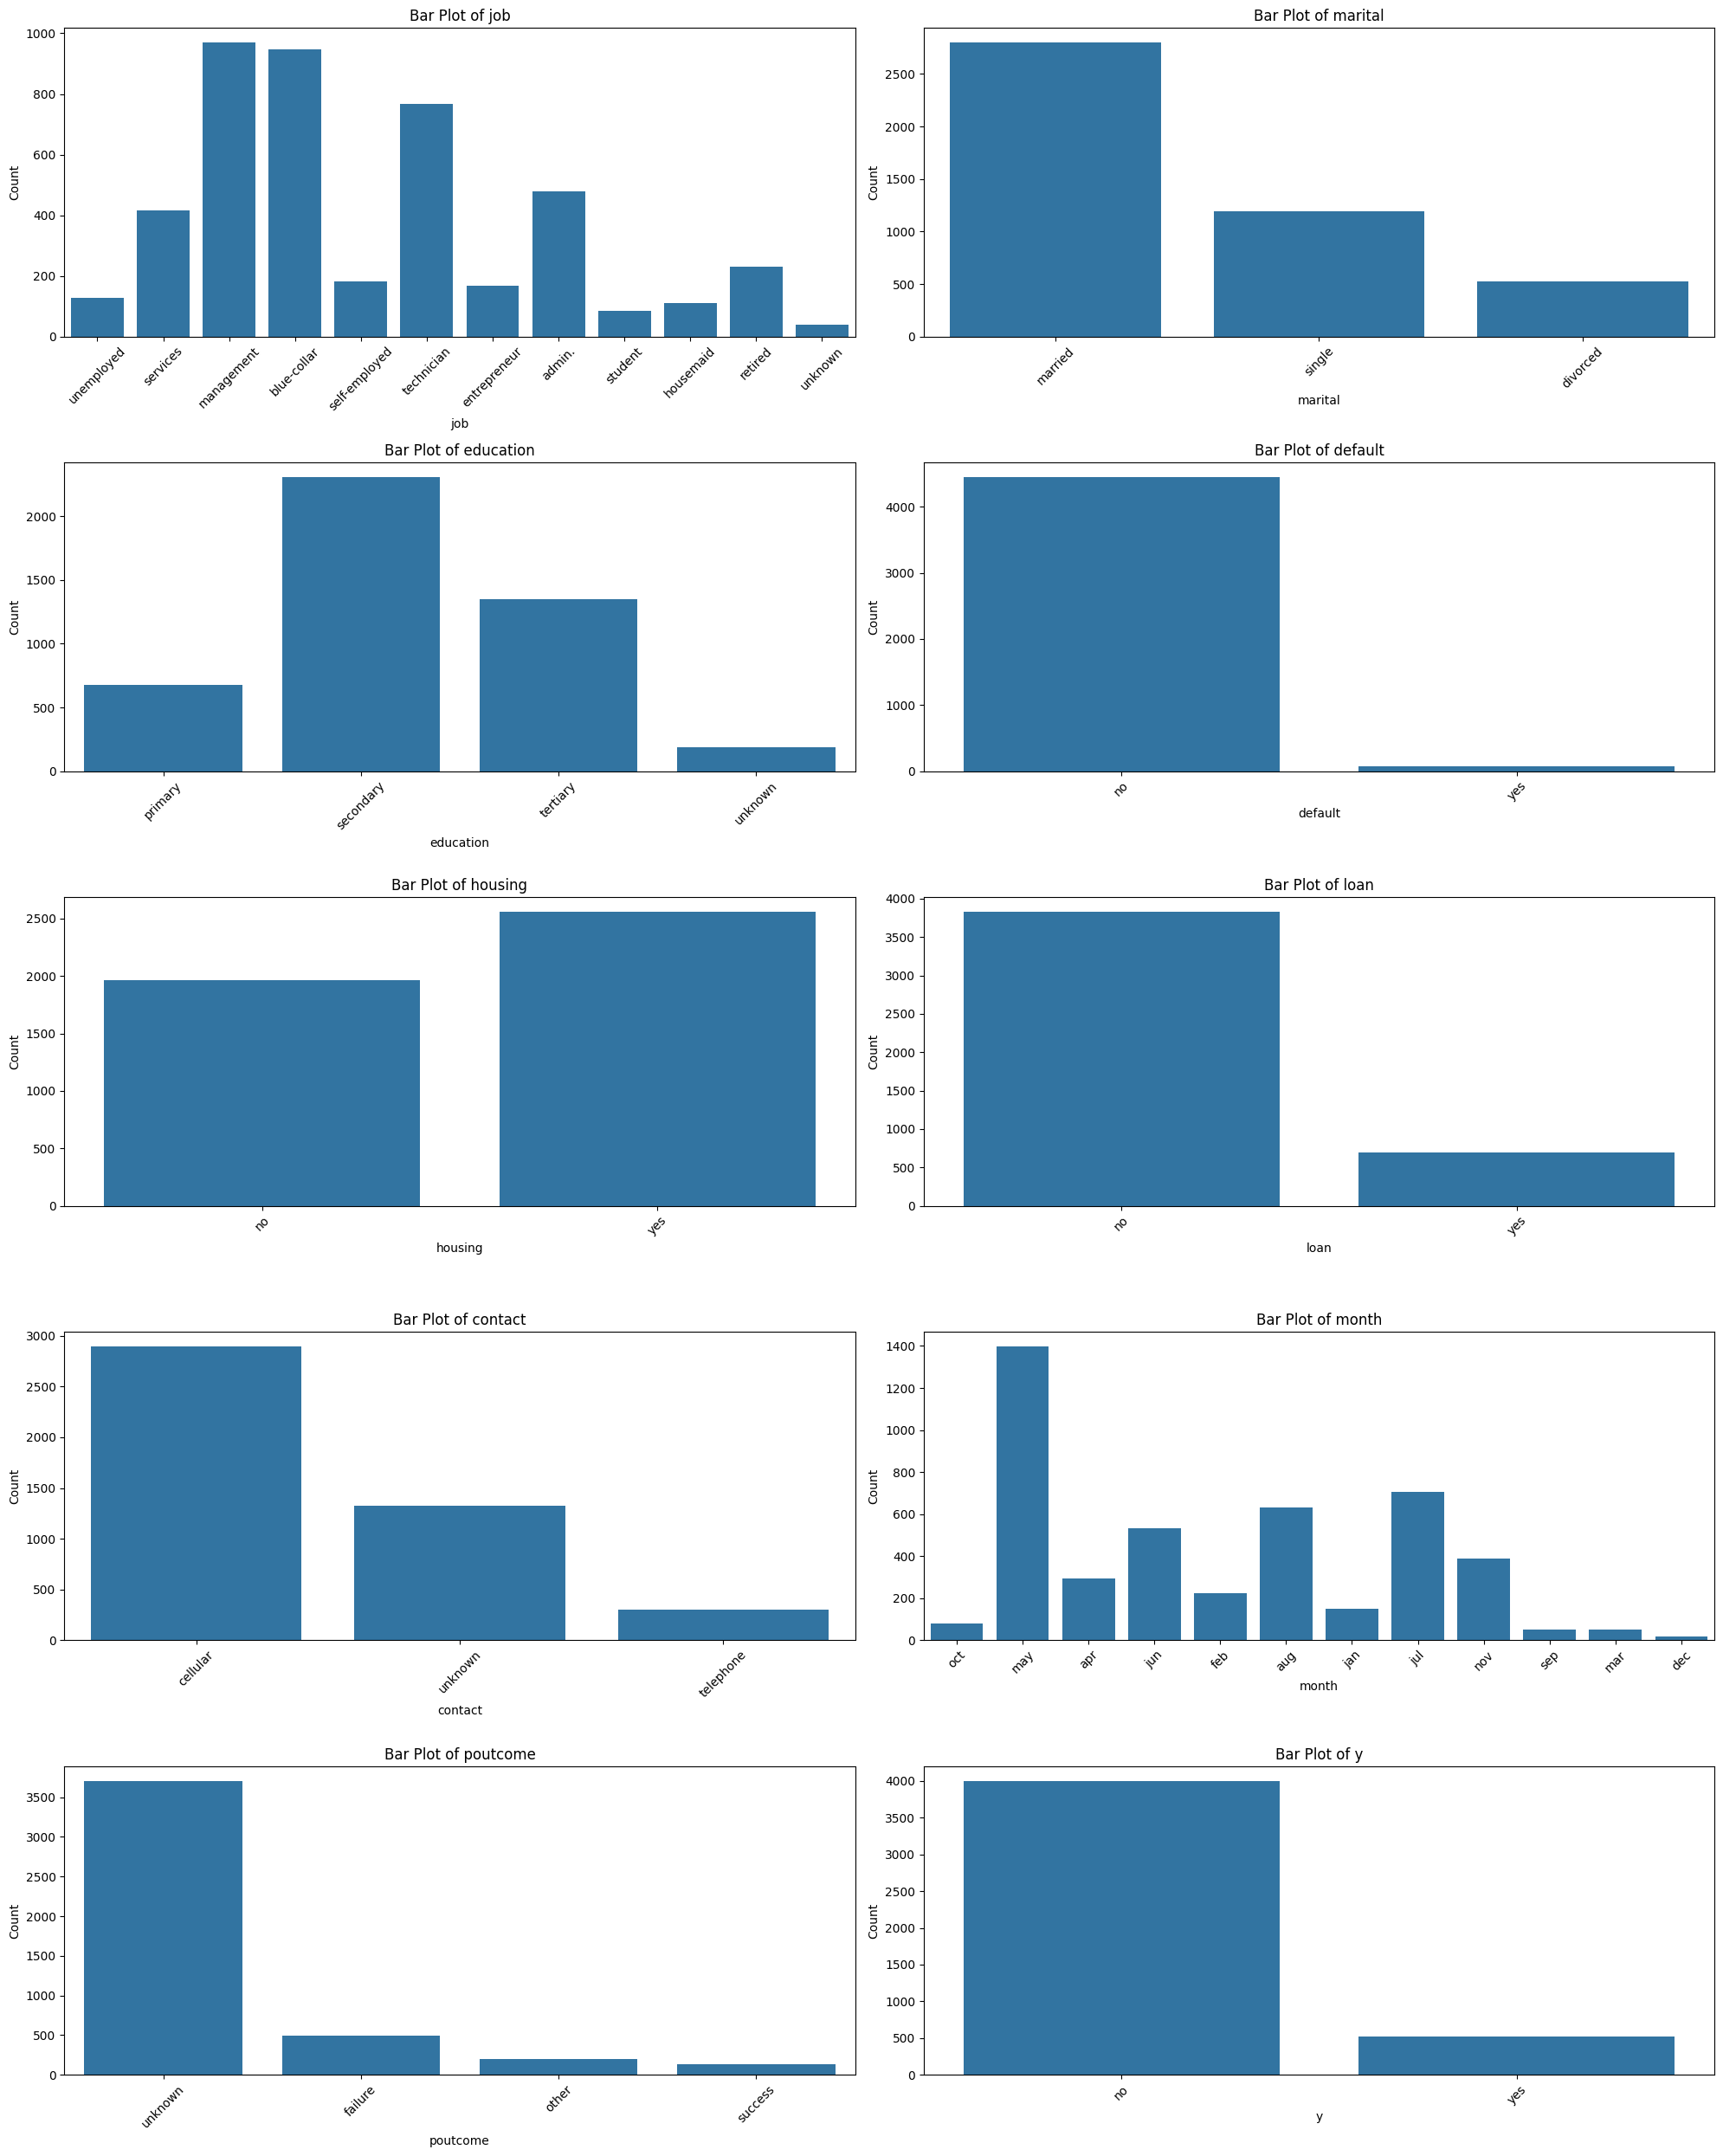

In [31]:

num_plots = len(cat_col)
num_rows = (num_plots + 1) // 2 
num_cols = 2

# Create a new figure
plt.figure(figsize=(20, 25))  

# Loop through each feature and create a countplot
for i, feature in enumerate(cat_col, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [26]:
df1=df.drop(columns=['day','month','duration','campaign','pdays'])

In [27]:
df1.rename(columns={ 'default':'credit','previous':'pre_cont'}, inplace=True)

In [28]:
df1

,age,job,marital,education,credit,balance,housing,loan,contact,pre_cont,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,3,other,no


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   credit     4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   pre_cont   4521 non-null   int64 
 10  poutcome   4521 non-null   object
 11  y          4521 non-null   object
dtypes: int64(3), object(9)
memory usage: 424.0+ KB


In [16]:
df1.describe()

,age,balance,pre_cont
count,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,0.542579
std,10.576211,3009.638142,1.693562
min,19.000000,-3313.000000,0.000000
25%,33.000000,69.000000,0.000000
50%,39.000000,444.000000,0.000000
75%,49.000000,1480.000000,0.000000
max,87.000000,71188.000000,25.000000


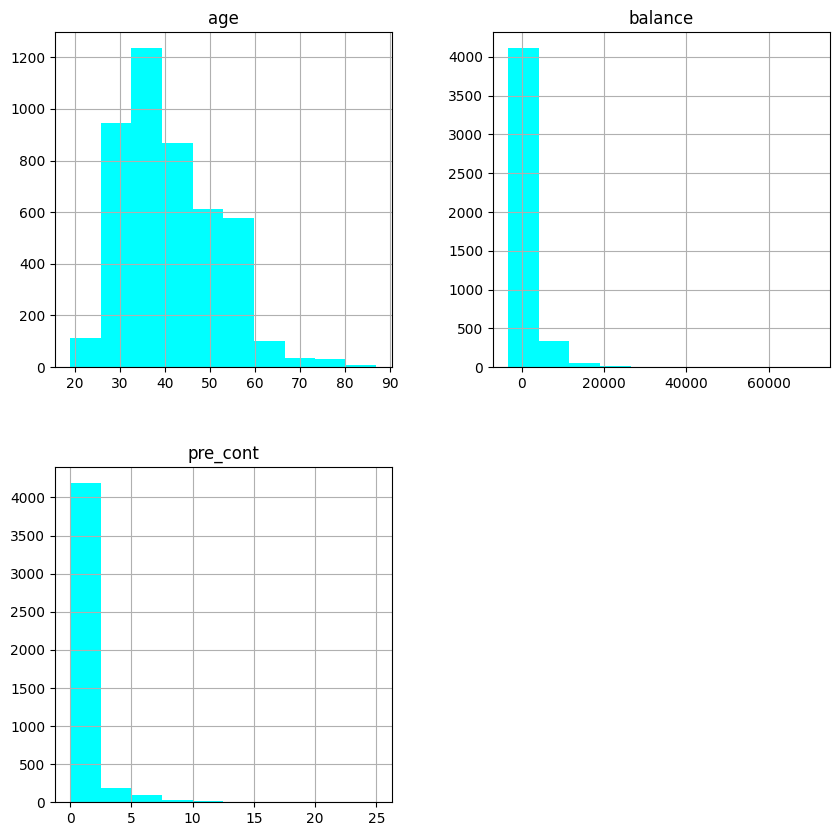

In [17]:
df1.hist(figsize=(10,10),color='#00FFFF')
plt.show()

In [63]:

df_num=df.select_dtypes(exclude='object')
df_num.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


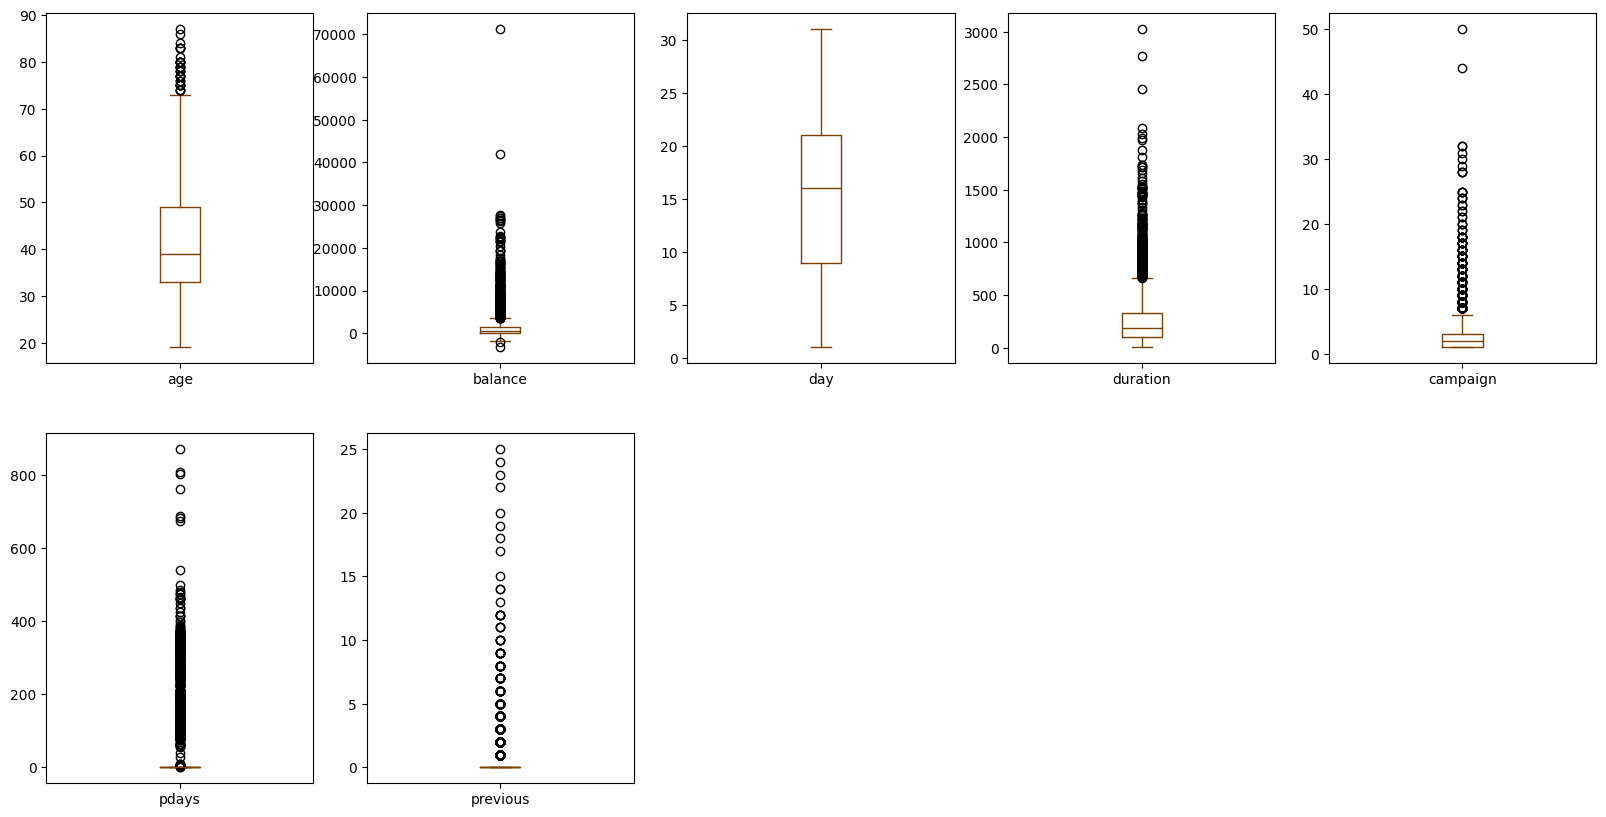

In [35]:
df_num.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

<Axes: >

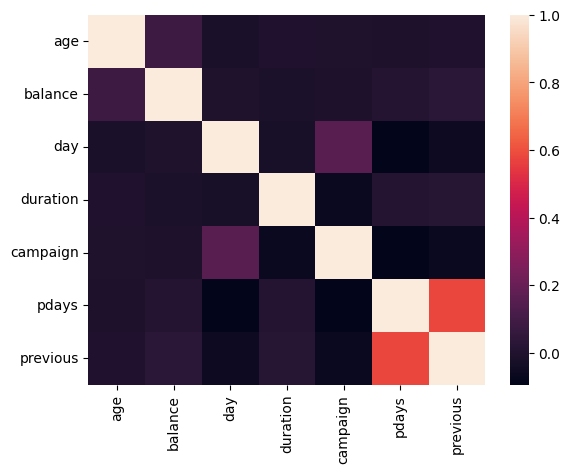

In [64]:
sns.heatmap(df_num.corr())

In [60]:
df1.head()

,age,job,marital,education,credit,balance,housing,loan,contact,pre_cont,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,0,unknown,no


In [98]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection  import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [86]:
x = df1.drop('y',axis=1)  # independent variable
y = df1['y'] 
y=LabelEncoder().fit_transform(y)


array([0, 0, 0, ..., 0, 0, 0])

In [89]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=20)

In [100]:
step1=ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[1,2,3,4,6,7,8,10])],remainder='passthrough')
step2=DecisionTreeClassifier()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('mean absolute error',mean_absolute_error(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

r2_score -0.8877670471173542
mean absolute error 0.16789396170839468
0.8321060382916053


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
